#### In this notebook, we'll use some function to evaluate our model predictions, in terms of lean accuracy, confusion matrices and more. <br>
Start by handler functions for pickle files along with important library modules

In [2]:
import pickle
def writePickle(Variable, fname):
    filename = fname +".pkl"
    f = open("pickle_vars/"+filename, 'wb')
    pickle.dump(Variable, f)
    f.close()
def readPickle(fname):
    filename = "pickle_vars/"+fname +".pkl"
    f = open(filename, 'rb')
    obj = pickle.load(f)
    f.close()
    return obj

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

import seaborn as sn
import matplotlib.pyplot as plt

from pylab import savefig

import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

Define your variables at this point: <br>
- what model type will you look at (rhyme, sub-word, character)
- what label type (artist, genre)
- what will be your auxiliary variables in accordance with the selected label type

In [3]:
'''A LIST OF YOUR BEST *ARTIST* LABEL PREDICTIONS FOR EACH MODEL TYPE'''

# character model predictions
character_models_artist = ["Predictions_character_artist_B100E20ES4max_length:_8303vocab_size:_116kernel_sizes:_[7, 6, 5]kernelseach:_10025.12.2020.04:27:34",
                          "Predictions_character_artist_B100E20ES4max_length:_8303vocab_size:_116kernel_sizes:_[11, 9, 7, 5]kernelseach:_10013.01.2021.02:15:43"]
# subword model predictions
sub_word_models_artist = ["Predictions_sub_word_artist_B50E25ES6max_length:_2441vocab_size:_10000kernel_sizes:_[5, 4, 3]kernelseach:_10025.12.2020.20:24:13",
                          "Predictions_sub_word_artist_B100E25ES6max_length:_2441vocab_size:_10000kernel_sizes:_[5, 4, 3]kernelseach:_10025.12.2020.19:37:27",
                         "Predictions_sub_word_artist_B50E25ES6max_length:_2441vocab_size:_10000kernel_sizes:_[9, 7, 5]kernelseach:_10025.12.2020.20:50:15"]
# rhyme model predictions
rhyme_models_artist = ["Predictions_rhyme_artist_B100E50ES10max_length:_5913vocab_size:_89kernel_sizes:_[11, 9, 7, 5]kernelseach:_10029.12.2020.15:03:22",
                      "Predictions_rhyme_artist_B100E25ES4max_length:_5913vocab_size:_89kernel_sizes:_[11, 9, 7, 5]kernelseach:_10029.12.2020.01:26:30",
                      "Predictions_rhyme_artist_B100E25ES4max_length:_5913vocab_size:_89kernel_sizes:_[11, 9, 7, 5]kernelseach:_10028.12.2020.21:36:18",
                      "Predictions_rhyme_artist_B100E50ES10max_length:_5913vocab_size:_89kernel_sizes:_[11, 9, 7, 5]kernelseach:_10029.12.2020.19:07:26"]

'''A LIST OF YOUR BEST *GENRE* LABEL PREDICTIONS FOR EACH MODEL TYPE'''

# character model predictions
character_models_genre = ["Predictions_character_genre_B100E50ES10max_length:_8303vocab_size:_116kernel_sizes:_[7, 6, 5]kernelseach:_10008.01.2021.03:05:46"]
# subword model predictions
sub_word_models_genre = ["Predictions_sub_word_genre_B100E50ES10max_length:_2441vocab_size:_10000kernel_sizes:_[5, 4, 3]kernelseach:_10011.01.2021.12:04:38",
                        "Predictions_sub_word_genre_B50E50ES10max_length:_2441vocab_size:_10000kernel_sizes:_[5, 4, 3]kernelseach:_10008.01.2021.15:50:47"]
# rhyme model predictions
rhyme_models_genre = ["Predictions_rhyme_genre_B100E50ES10max_length:_5913vocab_size:_88kernel_sizes:_[11, 9, 7, 5]kernelseach:_10014.01.2021.19:27:51",
                      "Predictions_rhyme_genre_B100E50ES10max_length:_5913vocab_size:_88kernel_sizes:_[11, 9, 7, 5]kernelseach:_10008.01.2021.15:08:30"]


'''LABEL DICTIONARY AND TEST LABEL SET PAIRS DEPENDING ON LABEL TYPE'''

label_dictionary = readPickle("id2genre") # GENRE
#label_dictionary = readPickle("id2artist") # ARTIST




### 1- Test Accuracy Score

In [4]:
'''DECIDE WHICH MODEL TYPE, LABEL TYPE AND THE PREDICTION FILE YOU WANT TO WORK WITH'''

#model_type = "sub_word"
#model_type = "character"
model_type = "rhyme"

#label_type = "artist"
label_type = "genre"

# read the prediction file that you want to work with
predictions = readPickle(str("predictions/"+rhyme_models_genre[1]))

# get the test labels accordingly
test_labels = readPickle(str(model_type+"/"+"y_te_"+label_type))


## uncomment the following to get the best combination of model predictions
p1 = readPickle(str("predictions/"+rhyme_models_genre[1]))
p2 = readPickle(str("predictions/"+character_models_genre[0]))
p3 = readPickle(str("predictions/"+sub_word_models_genre[0]))
predictions = p1+p2+p3
#####

'''THE REST WILL PRODUCE THE TEST ACCURACY SCORE BASED ON YOUR SELECTIONS SO FAR'''

TA = sum([a==b for a,b in zip(np.argmax(predictions, axis=-1), np.argmax(test_labels, axis=-1))])/len(test_labels)

# overall test score        
print("The test accuracy score for this model is:",'%.6f' % TA)


The test accuracy score for this model is: 0.475000


In [9]:
# another minor calculation for multiple model combinations: see what happens if you were to pick the best guess all the time
label_dictionary = readPickle("id2artist")

Bests = [True if (label_dictionary[t+1] in [label_dictionary[a+1],label_dictionary[b+1],label_dictionary[c+1]]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
            
print("Accuracy if we were to always pick the correct label:", sum(Bests)/len(Bests))
      

Accuracy if we were to always pick the correct label: 0.6308333333333334


### 2- Confusion Matrix

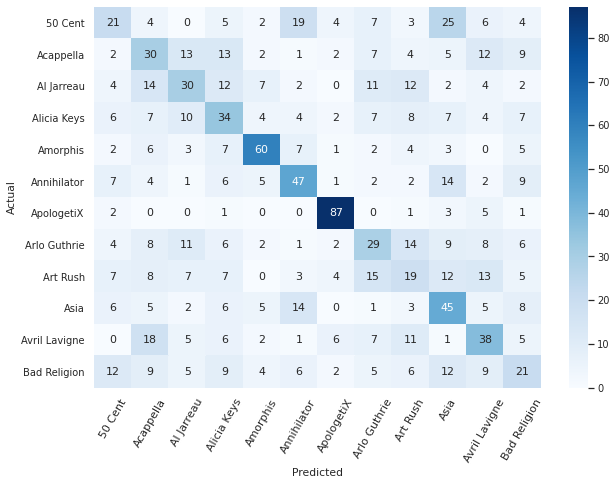

In [10]:
'''DECIDE WHICH MODEL TYPE, LABEL TYPE AND THE PREDICTION FILE YOU WANT TO WORK WITH'''

#model_type = "sub_word"
#model_type = "character"
model_type = "rhyme"

#label_type = "artist"
label_type = "genre"

# read the prediction file that you want to work with
predictions = readPickle(str("predictions/"+rhyme_models_genre[0]))

## uncomment the following to get the best COMBINATION of model predictions
#p1 = readPickle(str("predictions/"+rhyme_models_genre[0]))
#p2 = readPickle(str("predictions/"+character_models_genre[0]))
#p3 = readPickle(str("predictions/"+sub_word_models_genre[0]))
#predictions = p1+p2+p3
#####

'''THE REST WILL PRODUCE THE CONFUSION MATRIX BASED ON YOUR SELECTIONS SO FAR'''

# get the test label set in line with your model and label type selections
test_labels = readPickle(str(model_type+"/"+"y_te_"+label_type))

# create two empty lists for recording the true and predicted labels
y_true, y_pred = list(), list()

for a, b in zip(np.argmax(predictions, axis=-1), np.argmax(test_labels, axis=-1)):
    y_true.append(label_dictionary[b+1]) # add plus one since the indexing in label dict starts from 1
    y_pred.append(label_dictionary[a+1]) # add plus one since the indexing in label dict starts from 1
    
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=0.9)#for label size
    
yticks = df_cm.index
plt.yticks(rotation=145)
confusion_graph = sn.heatmap(df_cm, cmap="Blues",xticklabels=yticks, annot=True,annot_kws={"size": 11})# font size
confusion_graph.set_xticklabels(confusion_graph.get_xticklabels(), rotation = 60, fontsize = 11)
figure = confusion_graph.get_figure()    
figure.savefig('sn_confusion.png', dpi=100, bbox_inches = 'tight')

### 3- Class Based F Scores

In [11]:
'''DECIDE WHICH MODEL TYPE, LABEL TYPE AND THE PREDICTION FILE YOU WANT TO WORK WITH'''

#model_type = "sub_word"
#model_type = "character"
model_type = "rhyme"

label_type = "artist"
#label_type = "genre"

# read the prediction file that you want to work with
predictions = readPickle(str("predictions/"+rhyme_models_artist[0]))

## uncomment the following to get the best COMBINATION of model predictions
#p1 = readPickle(str("predictions/"+rhyme_models_artist[0]))
#p2 = readPickle(str("predictions/"+character_models_artist[0]))
#p3 = readPickle(str("predictions/"+sub_word_models_artist[0]))
#predictions = p1+p2+p3
#####

'''THE REST WILL PRODUCE THE CLASS BASED F-SCORES BASED ON YOUR SELECTIONS SO FAR'''

# get the test label set in line with your model and label type selections
test_labels = readPickle(str(model_type+"/"+"y_te_"+label_type))

if label_type == "genre":
    label_dictionary = readPickle("id2genre") 
    index = [label_dictionary[i+1] for i in range(12)]
else:
    label_dictionary = readPickle("id2artist") 
    index = [label_dictionary[i+1] for i in range(120)]
    
# using sklearn.metrics
precision, recall, fscore, support = score(np.argmax(test_labels, axis=-1), np.argmax(predictions, axis=-1), zero_division=0) 

class_based_scores = pd.DataFrame(list(zip(precision, recall, fscore, support)), index = index,
                                              columns =['Precision', 'Recall', 'Fscore', 'Support'])



pd.set_option('display.max_rows', class_based_scores.shape[0]+1)
class_based_scores.round(3)


,Precision,Recall,Fscore,Support
50 Cent,0.280,0.7,0.400,10
Acappella,1.000,0.8,0.889,10
Al Jarreau,0.077,0.1,0.087,10
Alicia Keys,0.000,0.0,0.000,10
Amorphis,0.273,0.3,0.286,10
Annihilator,0.182,0.2,0.190,10
ApologetiX,0.238,0.5,0.323,10
Arlo Guthrie,0.600,0.6,0.600,10
Art Rush,0.000,0.0,0.000,10
Asia,0.000,0.0,0.000,10


In [12]:
average_precision = class_based_scores["Precision"].mean()
average_recall = class_based_scores["Precision"].mean()
average_fscore = class_based_scores["Fscore"].mean()
print(average_precision, average_recall, average_fscore)

0.158394786951095 0.158394786951095 0.14761561297992626


In [13]:
print("F1 macro averaging:",f1_score(np.argmax(test_labels, axis=-1), np.argmax(predictions, axis=-1), average='macro'))

F1 macro averaging: 0.14761561297992626


### 4- Analysis of Accuracy vs. Input Length
For the best character-embedding model for artist labels

In [14]:
# get our test set, test labels and the predictions produced by the best character model
test_set = readPickle(str("character/x_te_artist"))
test_labels = readPickle("character/y_te_artist")
predictions = readPickle(str("predictions/"+character_models_artist[0]))

# create the ordered list, where each element shows the correctness of prediction, and the index of each element 
# corresponds to the position in the test set
TA = [True if a == b else False for a,b in zip(np.argmax(predictions, axis=-1), np.argmax(test_labels, axis=-1))]

In [15]:
sums = []
for j in range(len(test_set)):
    sums.append(sum([1 for i in test_set[j] if i != 0]))

In [16]:
bins = {"<500": [], "500-1000": [], "1000-1500": [], "1500-2000": [], ">=2000" : []}
i = 0
for s in sums:
    if s < 500:
        bins["<500"].append((s,TA[i]))
    elif s >= 500 and s < 1000:
        bins["500-1000"].append((s,TA[i]))
    elif s >= 1000 and s < 1500:
        bins["1000-1500"].append((s,TA[i]))
    elif s >= 1500 and s < 2000:
        bins["1500-2000"].append((s,TA[i]))
    elif s >= 2000:
        bins[">=2000"].append((s,TA[i]))
    i += 1

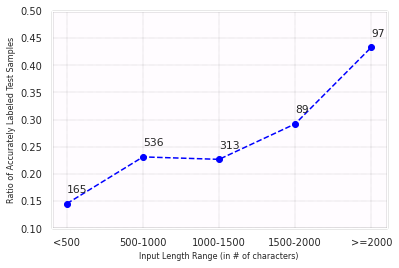

In [17]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


fig = pyplot.figure()
ax = fig.add_subplot(111)

char_length_ranges = list(bins.keys())
accuracies = [sum([item[1] for item in value])/len(value) for value in bins.values()]
supports = [len(value) for value in bins.values()]
ax.set_ylim(0.1,0.5)
ax.set_facecolor((1.0, 0.99, 1.0))
  

pyplot.plot(char_length_ranges,accuracies, linestyle='--', marker='o', color='blue')
for i,j,k in zip(char_length_ranges, accuracies, supports):
    ax.annotate(str(k),xy=(i,j+0.02))
ax.grid(color='black', linestyle=':', linewidth=0.2)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.2')
pyplot.xlabel('Input Length Range (in # of characters)', fontsize=8)
pyplot.ylabel('Ratio of Accurately Labeled Test Samples', fontsize=8)
#pyplot.show()
pyplot.savefig("acc_vs_length")

### 5- Accuracy and Loss Plots of Models

In [461]:
import keras
from matplotlib import pyplot as plt
import matplotlib.style

import matplotlib.gridspec as gridspec
import numpy as np

def acc_loss_plotter(metric: str):
    file_nm1 = 'pickle_vars/history/'+character_models_artist[0][12:]
    file_nm2 = 'pickle_vars/history/'+character_models_genre[0][12:]
    file_nm3 = 'pickle_vars/history/'+sub_word_models_artist[0][12:]
    file_nm4 = 'pickle_vars/history/'+sub_word_models_genre[0][12:]
    file_nm5 = 'pickle_vars/history/'+rhyme_models_artist[0][12:]
    file_nm6 = 'pickle_vars/history/'+rhyme_models_genre[0][12:]
    
    if metric == "genre":
        files = [file_nm2, file_nm4, file_nm6]
        model_names = ["CH1GE", "SW1GE", "PH1GE"]
        early_stopping = [10,10,10]
    elif metric == "artist":
        files = [file_nm1, file_nm3, file_nm5]
        model_names = ["CH1AR-S", "SW1AR-50", "PH1AR-F"]
        early_stopping = [4,6,10]
    else:
        raise ValueError("Metric type should be either 'genre' or 'artist'")

    # construct the plot outline of the figure
    fig1 = plt.figure(constrained_layout=True, figsize=(10,5))
    #fig1.suptitle("Accuracy and Loss Plots for Different Model Types", fontsize=12, y= 1.05)
    spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig1)
    ax11 = fig1.add_subplot(spec[0, 0])
    ax12 = fig1.add_subplot(spec[0, 1])
    ax13 = fig1.add_subplot(spec[0, 2])
    ax21 = fig1.add_subplot(spec[1, 0])
    ax22 = fig1.add_subplot(spec[1, 1])
    ax23 = fig1.add_subplot(spec[1, 2])
    axes = [ax11, ax12, ax13, ax21, ax22, ax23]
    spec.update(wspace = 0.5, hspace = 0.5)
                      
    for file_nm, axis, model_name, es in zip(files, axes[0:3], model_names, early_stopping):
        with open(file_nm, 'rb') as file:
            history=pickle.load(file)
        nb_epochs = len(history['acc'])
        axis.plot(history['acc'], color='lightblue', linewidth=2, linestyle = "-") 
        axis.plot(history['val_acc'], color='orange', linewidth=2, linestyle = "--")
        axis.set_ylim(0.0, 1.0)
        axis.set(title=model_name)
        axis.title.set_size(13)        
        axis.yaxis.set_ticks(np.arange(0, 1, 0.1))
        axis.legend(["training accuracy","validation accuracy"])
        axis.set_facecolor('white')
        axis.set(ylabel='accuracy')
        axis.set(xlabel='epoch')
        axis.axvline(x=nb_epochs-es, color="yellow", label = "early")
        axis.grid(b=False, which='major', color='#666666', linestyle='--', linewidth = 0.3)

    for file_nm, axis, model_name, es in zip(files, axes[3:], model_names, early_stopping):
        with open(file_nm, 'rb') as file:
            history=pickle.load(file)
        nb_epochs = len(history['acc'])
        axis.plot(history['loss'], color='lightgreen', linewidth=2, linestyle = "-") 
        axis.plot(history['val_loss'], color='purple', linewidth=2, linestyle = "--")
        #axis.set_ylim(0.0, 1.0)
        #axis.set(title=model_name)
        axis.yaxis.set_ticks(np.arange(0, 5.5, 0.5))
        axis.legend(["training loss","validation loss"])
        axis.set_facecolor('white')
        axis.set(ylabel='loss')
        axis.set(xlabel='epoch')
        axis.axvline(x=nb_epochs-es, color="yellow", label = "early")
        axis.grid(b=False, which='major', color='#666666', linestyle='--', linewidth = 0.3)

    #plt.show() 
    plt.savefig(metric+'_accuracy_loss.png',bbox_inches='tight')






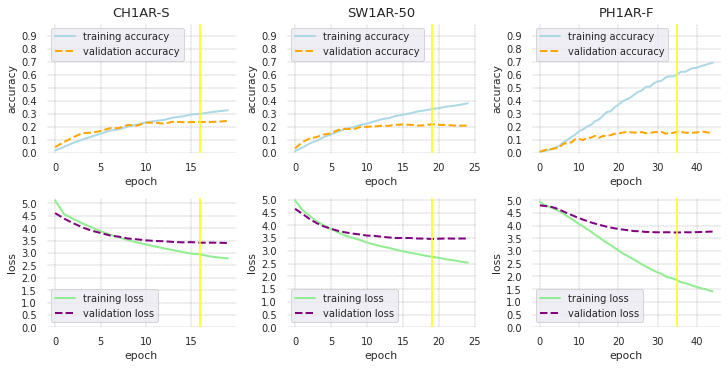

In [462]:
acc_loss_plotter("artist")

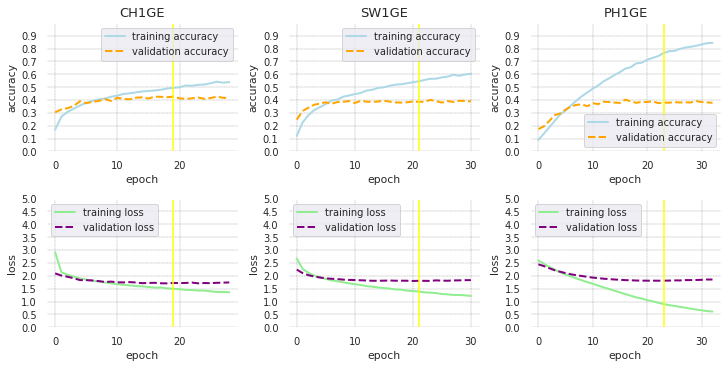

In [463]:
acc_loss_plotter("genre")

###  6- Model Similarity

Here we look at the correctly predicted labels from a number of distinct models. Then we analyze how the similar/dissimilar their predictions were

As an example, we'll look at the best artist models from all 3 distinct input types

In [36]:
p1 = readPickle(str("predictions/"+rhyme_models_artist[0]))
p2 = readPickle(str("predictions/"+character_models_artist[0]))
p3 = readPickle(str("predictions/"+sub_word_models_artist[0]))

def accuracy_comparison(label_type):
    if label_type not in ["genre", "artist"]: # depending on the output type of the model, we need either 'genre' or 'artist' for this argument
        raise ValueError('argument "label_type" must be either "genre" or "artist"')
        
    if label_type == "genre":
        label_dictionary = readPickle(str("id2"+"genre"))
        test_labels = readPickle("sub_word/y_te_genre")
    else:
        label_dictionary = readPickle(str("id2"+"artist"))
        test_labels = readPickle("sub_word/y_te_artist")
    
    # the case where all the predictions are true
    all_true = [True if (label_dictionary[t+1] == label_dictionary[a+1] == label_dictionary[b+1] == label_dictionary[c+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p1_only = [True if (label_dictionary[t+1] == label_dictionary[a+1]) & (label_dictionary[b+1] != label_dictionary[t+1]) & (label_dictionary[c+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p2_only = [True if (label_dictionary[t+1] == label_dictionary[b+1]) & (label_dictionary[a+1] != label_dictionary[t+1]) & (label_dictionary[c+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p3_only = [True if (label_dictionary[t+1] == label_dictionary[c+1]) & (label_dictionary[a+1] != label_dictionary[t+1]) & (label_dictionary[b+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p1_p2_notp3 = [True if (label_dictionary[t+1] == label_dictionary[a+1] == label_dictionary[b+1]) & (label_dictionary[c+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p2_p3_notp1 = [True if (label_dictionary[t+1] == label_dictionary[b+1] == label_dictionary[c+1]) & (label_dictionary[a+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    p3_p1_notp2 = [True if (label_dictionary[t+1] == label_dictionary[a+1] == label_dictionary[c+1]) & (label_dictionary[b+1] != label_dictionary[t+1]) else False for a, b, c, t in zip(np.argmax(p1, axis=-1),np.argmax(p2, axis=-1),np.argmax(p3, axis=-1),np.argmax(test_labels, axis=-1))]
    combination = sum(all_true)+sum(p1_only)+sum(p2_only)+sum(p3_only)+sum(p1_p2_notp3)+sum(p2_p3_notp1)+sum(p3_p1_notp2)
    print("First selected prediction set has", sum(p1_only), "correct predictions unique to it!")
    print("Second selected prediction set has", sum(p2_only), "correct predictions unique to it!")
    print("Third selected prediction set has", sum(p3_only), "correct predictions unique to it!")
    print("\nThey all share", sum(all_true), "correct predictions.")
    print("\nModel 1 and 2 has", sum(p1_p2_notp3), "common correct predictions that is not shared by Model 3.")
    print("Model 2 and 3 has", sum(p2_p3_notp1), "common correct predictions that is not shared by Model 1.")
    print("Model 1 and 3 has", sum(p3_p1_notp2), "common correct predictions that is not shared by Model 2.")
    
    print("\nIf we were to make the best combination, we would have got", \
          combination,\
         "correct predictions, that correspond to a test accuracy of", combination/len(all_true)*100, "percent" )



In [37]:
accuracy_comparison("artist")

First selected prediction set has 56 correct predictions unique to it!
Second selected prediction set has 141 correct predictions unique to it!
Third selected prediction set has 77 correct predictions unique to it!

They all share 67 correct predictions.

Model 1 and 2 has 32 common correct predictions that is not shared by Model 3.
Model 2 and 3 has 47 common correct predictions that is not shared by Model 1.
Model 1 and 3 has 29 common correct predictions that is not shared by Model 2.

If we were to make the best combination, we would have got 449 correct predictions, that correspond to a test accuracy of 37.416666666666664 percent
